In [66]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, Ridge, Lasso 
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn import tree

In [67]:
data = pd.read_csv('usdata.csv')

dataset = pd.DataFrame(data)
dataset = dataset.iloc[:, 1:]

In [68]:
dataset = dataset.drop(columns=['Sector'])

In [69]:
dataset = dataset.fillna(dataset.mean())

In [70]:
dataset.head()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
0,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2348,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,32.794573,1
1,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,-0.2785,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,40.588068,1
2,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.0772,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,30.295514,1
3,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.0000,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,64.213737,1
4,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2619,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,44.757840,1


In [71]:
dataset.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.392000e+03,4392.000000,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,4.392000e+03,...,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.038741e+10,192.385604,1.476686e+10,7.626177e+09,9.075586e+08,3.591246e+09,5.412730e+09,2.957483e+09,3.699974e+08,2.617902e+09,...,0.230613,2313.701640,4.562486,34.257313,5.436709,352.614358,0.798632,0.815591,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.584545e+07,0.000000,5.607401e+06,3.737700e+07,0.000000e+00,2.170000e+07,4.624375e+07,-5.199308e+06,0.000000e+00,-9.525389e+06,...,0.000000,-0.041800,0.000000,-0.032200,-0.095025,-0.070100,0.000000,0.000000,-7.477173,0.000000
50%,5.200504e+08,0.078800,2.070455e+08,2.384675e+08,0.000000e+00,1.040695e+08,2.017610e+08,4.366150e+07,7.534500e+06,2.967350e+07,...,0.000000,0.017800,0.000000,0.042850,0.038800,0.000000,0.000000,0.073600,17.639393,1.000000
75%,2.582760e+09,0.211475,1.680075e+09,1.049348e+09,2.787450e+07,5.074550e+08,8.257220e+08,3.019341e+08,7.798475e+07,2.509250e+08,...,0.029025,0.214025,0.116325,0.201525,0.176275,0.186100,0.069625,0.155800,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


Total number of missing values in the dataset: 0


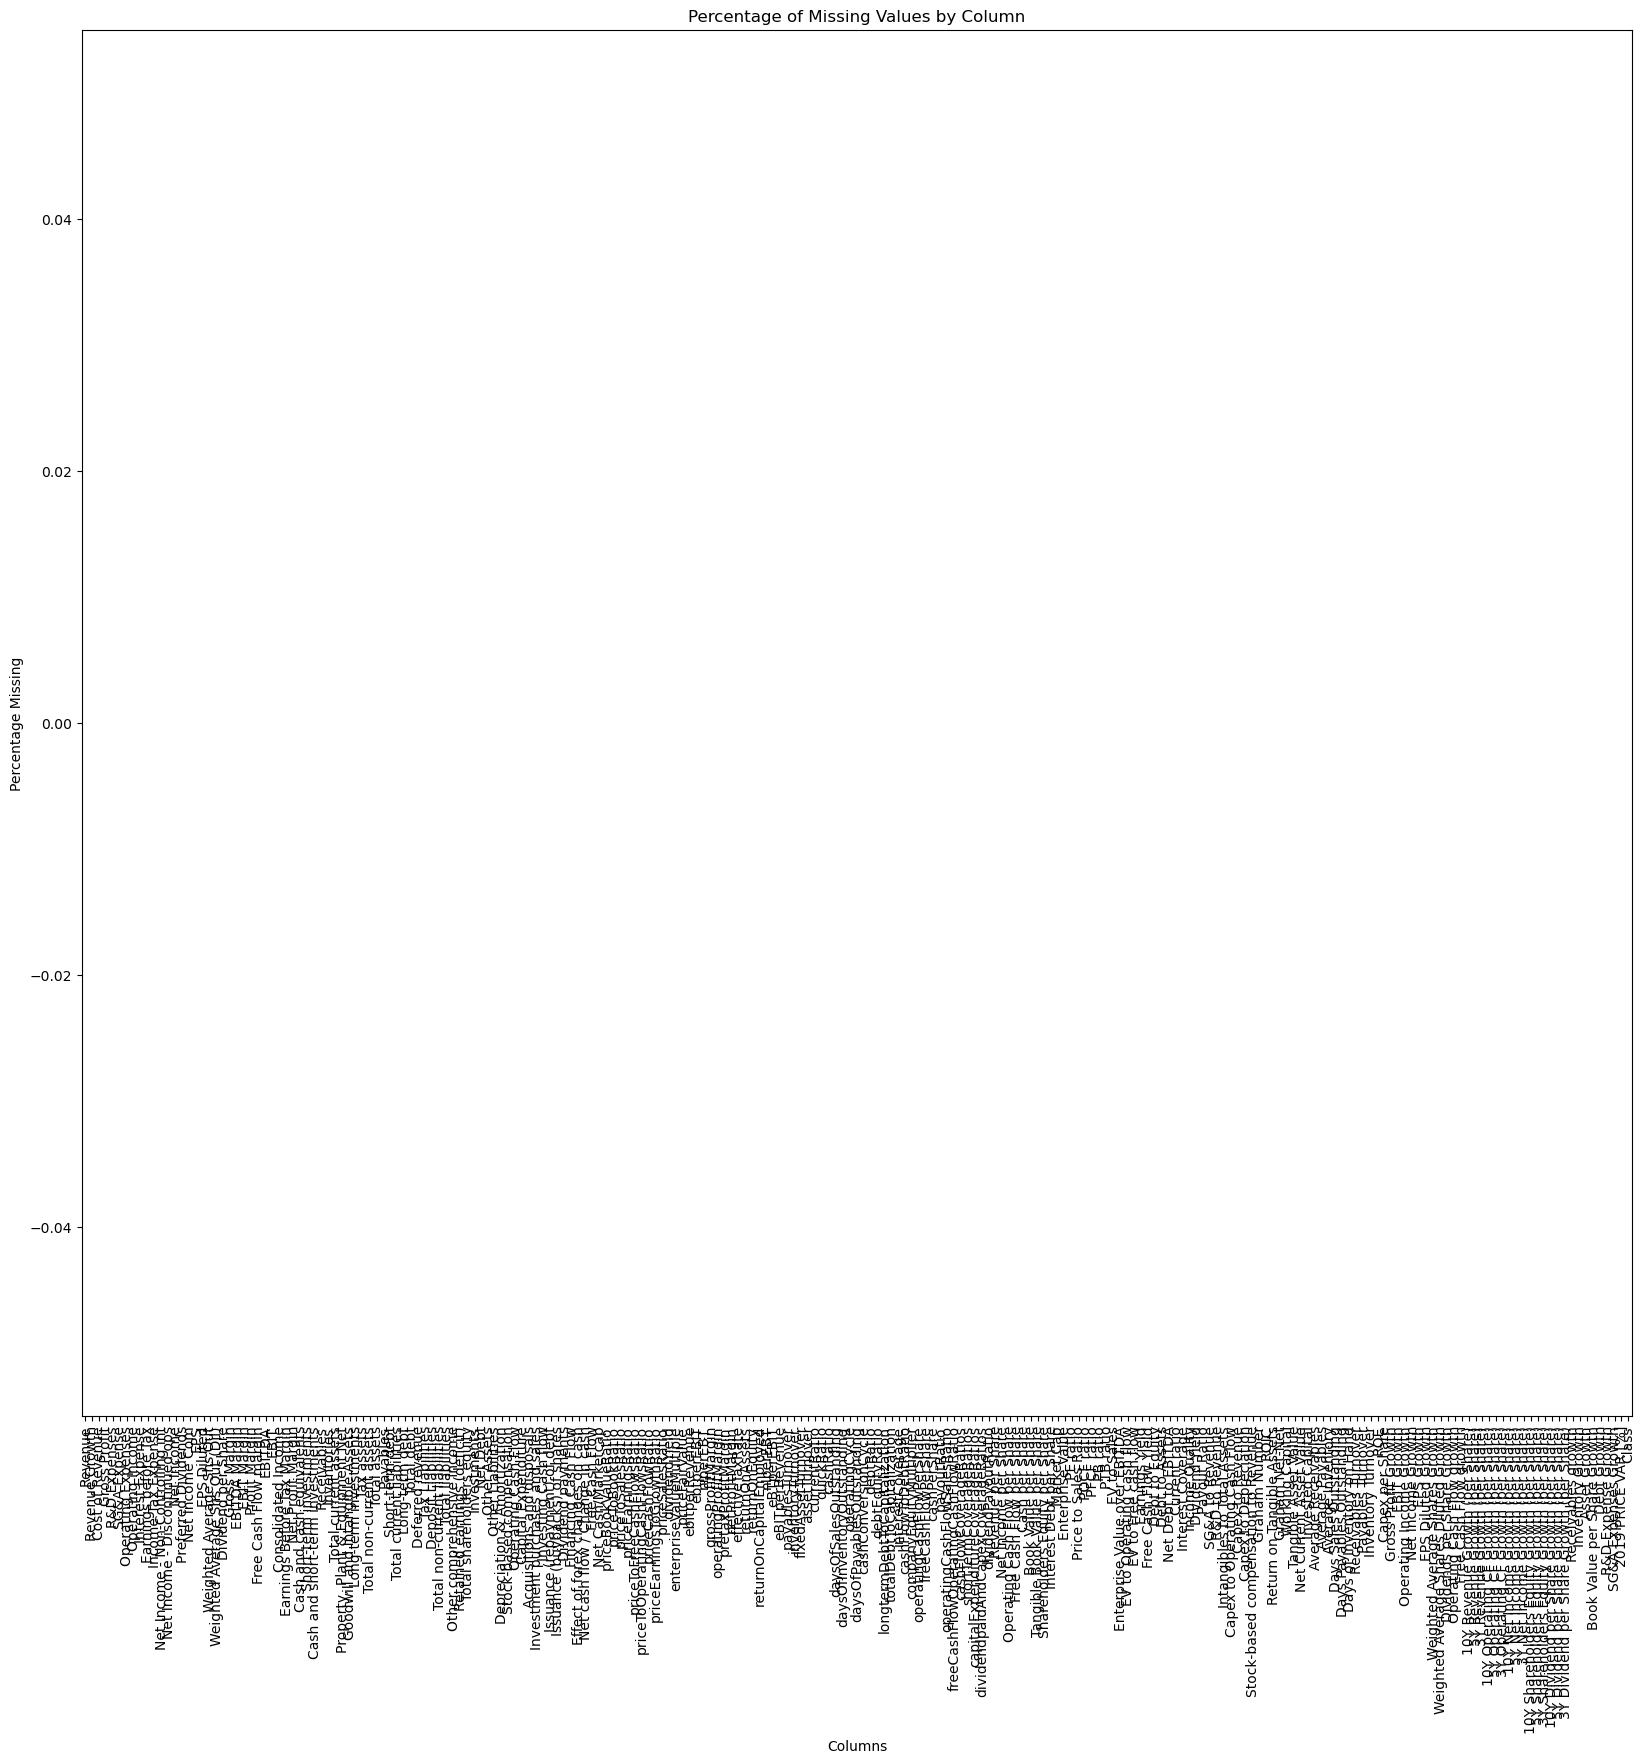

In [72]:
percentage_of_missing_values = 100 * dataset.isnull().sum() / len(dataset)
plt.figure(figsize=(20, 18))
percentage_of_missing_values.plot(kind="bar", color="blue")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.savefig('missing_values_plot(%).jpg')
total_missing_values = dataset.isnull().sum().sum()
print("Total number of missing values in the dataset:", total_missing_values)

In [73]:
dataset.corr()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
Revenue,1.000000,-0.003832,0.949863,0.812055,0.360698,0.698516,0.795681,0.637369,0.464188,0.649595,...,0.044230,-0.003749,-0.005397,-0.007729,-0.002711,-0.005749,-0.024346,-0.019323,0.005467,0.074351
Revenue Growth,-0.003832,1.000000,-0.003466,-0.004436,-0.001447,-0.004074,-0.004267,-0.005263,-0.004408,-0.005453,...,-0.000440,-0.000288,-0.000071,0.000460,0.000247,-0.000278,0.025975,0.001785,-0.003957,0.008974
Cost of Revenue,0.949863,-0.003466,1.000000,0.602083,0.254031,0.524388,0.605640,0.442944,0.387954,0.464038,...,0.030885,-0.000004,-0.004178,-0.006317,-0.003821,-0.005374,-0.022528,-0.014527,0.003441,0.063921
Gross Profit,0.812055,-0.004436,0.602083,1.000000,0.469982,0.848663,0.952834,0.830305,0.489902,0.835511,...,0.058429,-0.003892,-0.006294,-0.010027,0.000171,-0.004943,-0.021469,-0.023362,0.007945,0.079831
R&D Expenses,0.360698,-0.001447,0.254031,0.469982,1.000000,0.281439,0.424550,0.434980,0.106925,0.520185,...,0.021833,0.000064,-0.002184,-0.003679,0.008808,-0.003184,0.009420,-0.002101,0.013761,0.053686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debt Growth,-0.005749,-0.000278,-0.005374,-0.004943,-0.003184,-0.005567,-0.005927,-0.001912,-0.001447,-0.002130,...,-0.000557,-0.000010,-0.000648,-0.000247,0.088452,1.000000,-0.001358,0.128747,0.004504,0.013866
R&D Expense Growth,-0.024346,0.025975,-0.022528,-0.021469,0.009420,-0.020578,-0.020855,-0.017458,-0.024038,-0.015998,...,-0.000233,0.000009,0.000793,0.001074,0.005016,-0.001358,1.000000,0.076630,0.006575,-0.019599
SG&A Expenses Growth,-0.019323,0.001785,-0.014527,-0.023362,-0.002101,-0.013386,-0.017361,-0.028540,-0.019169,-0.024589,...,0.009531,0.000087,0.024719,0.127464,0.071619,0.128747,0.076630,1.000000,-0.006929,-0.036615
2019 PRICE VAR [%],0.005467,-0.003957,0.003441,0.007945,0.013761,0.010677,0.002296,0.016378,0.002456,0.017885,...,0.006612,-0.000775,-0.006934,-0.006313,-0.005772,0.004504,0.006575,-0.006929,1.000000,0.423306


In [74]:
X = dataset.drop(columns=['Class'])
y = dataset['Class']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
clf = LogisticRegression(solver= 'liblinear').fit(X_train_scaled, y_train)
print('Accuracy of Logit classifier on scaled training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of Logit classifier on scaled test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Accuracy of Logit classifier on scaled training set: 0.99
Accuracy of Logit classifier on scaled test set: 0.97


In [78]:
def evaluate_features(features):
    model = LogisticRegression()
    model.fit(X_train[features], y_train)
    y_pred = model.predict(X_test[features])
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [79]:
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train, y_train)
lasso_features = list(X.columns[lasso_model.coef_ != 0])

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12013675421309244, tolerance: 0.05266287108580723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11912120909988744, tolerance: 0.05266287108580723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1179810688599332, tolerance: 0.05266287108580723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent

In [80]:
lasso_mse = evaluate_features(lasso_features)
print("Lasso Features:", lasso_features, "MSE:", lasso_mse)

Lasso Features: ['Total assets', 'Market Cap'] MSE: 0.29817905918057663


In [81]:
alphas = np.logspace(-6, 6, 13)
ridge_scores = []

In [82]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    ridge_scores.append(np.mean(scores))

In [83]:
best_ridge_alpha = alphas[np.argmax(ridge_scores)]
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(X_train_scaled, y_train)
print(f'Best Ridge Alpha: {best_ridge_alpha}')

Best Ridge Alpha: 1000.0


In [84]:
ridge_param_grid = {'alpha': np.logspace(-6, 6, 13)}
ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)
print(f'Best Ridge Alpha: {ridge_grid.best_params_["alpha"]}')

Best Ridge Alpha: 1000.0


In [85]:
alphas = np.logspace(-6, 6, 13)
lasso_scores = []

In [117]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_scores.append(np.mean(scores))

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 5.266e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+02, tolerance: 5.189e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+02, toleranc

In [118]:
best_lasso_alpha = alphas[np.argmax(lasso_scores)]
best_lasso_model = Lasso(alpha=best_lasso_alpha)
best_lasso_model.fit(X_train_scaled, y_train)
print(f'Best Lasso Alpha: {best_lasso_alpha}')

Best Lasso Alpha: 0.01


In [119]:
lasso_param_grid = {'alpha': np.logspace(-6, 6, 13)}
lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)
print(f'Best Lasso Alpha: {lasso_grid.best_params_["alpha"]}')

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.432e+02, tolerance: 5.266e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+02, tolerance: 5.189e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.444e+02, toleranc

Best Lasso Alpha: 0.01


In [120]:
alpha_list = 15**np.linspace(10, -4, 50)*0.5
Lassomodel = LassoCV(alphas=alpha_list, fit_intercept=True, cv=None)
Lassomodel.fit(X_train, y_train)
print('The best alpha value is {:.4f}'.format(Lassomodel.alpha_))
best_alpha = Lassomodel.alpha_
best_coeffs = Lassomodel.coef_
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=best_alpha, max_iter = 10000).fit(X_train, y_train)
r2_train = linlasso.score(X_train, y_train)
r2_test = linlasso.score(X_test, y_test)
print('Alpha = {:.4f}\nFeatures kept: {}, \nR-squared score (training): {:.3f}, \nR-squared score (test): {:.3f}\n'
         .format(best_alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))
mean_sq_err_val_train = mean_squared_error(y_train, linlasso.predict(X_train))
mean_sq_err_val_test = mean_squared_error(y_test, linlasso.predict(X_test))
print('Features with non-zero weight:')
for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('{}, {:.3f}'.format(e[0], e[1]))
print('\nTraining data MSE: {:.3f}'.format(mean_sq_err_val_train))
print('Testing data MSE: {:.3f}'.format(mean_sq_err_val_test))

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.876262207515992, tolerance: 0.05266287108580723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125.93673654453033, tolerance: 0.05266287108580723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 182.3558641129874, tolerance: 0.05266287108580723
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py

The best alpha value is 2777961041.2276
Alpha = 2777961041.2276
Features kept: 2, 
R-squared score (training): 0.002, 
R-squared score (test): 0.001

Features with non-zero weight:
Total assets, 0.000
Market Cap, -0.000

Training data MSE: 0.213
Testing data MSE: 0.210


c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.27242079407662, tolerance: 0.052935731707317114
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 145.22633966153944, tolerance: 0.052935731707317114
  model = cd_fast.enet_coordinate_descent_gram(


In [90]:
selected_features = X_train.columns[lasso_model.coef_ != 0]

In [91]:
print(selected_features)

Index(['Total assets', 'Market Cap'], dtype='object')


In [92]:
pca = PCA(n_components= 222)
X_reduced = pca.fit_transform(X_train_scaled)
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,221
0,0.145264,0.000738,-0.131443,0.000781,0.001635,0.002768,-0.016396,-0.037089,0.001452,-0.020453,...,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
1,-0.001397,0.000338,0.001432,-0.000138,-0.000948,-0.000013,0.000045,-0.015729,-0.002419,-0.006635,...,1.033415e-15,3.690425e-16,2.556148e-15,1.449802e-15,2.663728e-16,-9.032696e-16,-2.582044e-15,-6.140751e-16,-7.302683e-16,-1.799173e-15
2,0.104743,-0.001416,-0.134961,0.000598,0.002722,0.006024,-0.016107,-0.048444,0.003725,-0.025207,...,-7.682147e-17,1.561618e-16,-1.423887e-16,1.835974e-16,-7.405054e-17,1.646205e-16,6.869994e-17,5.146312e-17,1.571630e-18,1.667887e-16
3,0.181699,0.004489,-0.090609,0.000915,-0.000752,-0.003892,-0.011897,-0.006795,-0.000751,-0.006747,...,3.049592e-16,1.584775e-16,2.057445e-15,-1.184388e-15,-6.808016e-16,-6.440038e-18,-1.094405e-15,6.724914e-16,-1.044188e-15,-2.629132e-15
4,0.076803,0.001366,-0.104227,0.000880,-0.002057,-0.014938,0.005230,0.070711,-0.009523,0.040553,...,-3.061454e-17,1.048620e-16,-5.464142e-17,6.757834e-17,1.794384e-16,1.185410e-16,1.209368e-16,-4.333395e-17,1.292129e-16,7.112368e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-0.002341,0.001055,0.000743,-0.000681,0.000273,-0.002911,0.000384,0.033029,-0.012474,-0.022519,...,-7.011628e-17,-2.695507e-17,7.354199e-17,-2.797713e-17,-1.456302e-17,4.286001e-17,-2.354445e-17,-6.005349e-17,-1.150963e-16,-4.384363e-17
218,-0.001071,-0.000462,0.001365,-0.000353,-0.000536,-0.000041,0.000044,0.004548,-0.001900,-0.010253,...,7.803861e-17,4.207420e-17,-1.973073e-17,2.603730e-17,-5.378627e-17,2.930996e-17,-2.711109e-17,-3.356760e-17,1.290437e-17,-8.609761e-17
219,-0.005061,0.012842,0.002630,-0.000772,-0.001470,-0.010279,0.000116,-0.008244,0.000513,-0.009384,...,-9.923108e-17,1.486462e-17,1.001937e-16,9.486755e-17,9.728645e-17,2.307618e-17,-2.264869e-17,-3.548931e-17,-3.715115e-17,-8.105630e-17
220,-0.007710,0.017997,-0.000667,-0.003145,-0.003359,0.004395,-0.000139,0.017092,0.000582,-0.080252,...,-9.725782e-18,-9.070873e-18,-5.342619e-17,-5.614259e-17,9.985583e-17,8.210096e-18,4.106856e-17,5.091306e-17,5.404186e-17,6.051123e-17


In [93]:
pca.singular_values_

array([2.74476669e+02, 2.05348000e+02, 1.76797118e+02, 1.56897352e+02,
       1.54272161e+02, 1.22336080e+02, 1.20903075e+02, 1.15050203e+02,
       1.10930314e+02, 1.05396016e+02, 1.03843252e+02, 1.01608788e+02,
       9.63736701e+01, 9.51903077e+01, 9.41842610e+01, 9.06135616e+01,
       9.04169431e+01, 8.74050226e+01, 8.65117389e+01, 8.61223266e+01,
       8.42642799e+01, 8.36421753e+01, 8.20395647e+01, 8.02666041e+01,
       7.95582038e+01, 7.94226359e+01, 7.92775989e+01, 7.87415433e+01,
       7.83239747e+01, 7.80996588e+01, 7.78685330e+01, 7.76406066e+01,
       7.73048402e+01, 7.59056218e+01, 7.56207848e+01, 7.48309046e+01,
       7.30001270e+01, 7.27507680e+01, 7.22244034e+01, 7.11875068e+01,
       7.00503970e+01, 6.95939012e+01, 6.85084118e+01, 6.74671445e+01,
       6.69056057e+01, 6.65313373e+01, 6.54758717e+01, 6.46751588e+01,
       6.38062980e+01, 6.29647597e+01, 6.18845051e+01, 6.15943573e+01,
       6.06944530e+01, 6.00150913e+01, 5.96056465e+01, 5.86764434e+01,
      

In [94]:
pd.DataFrame(X_reduced).loc[:4,:5]

,0,1,2,3,4,5
0,-1.183959,-0.315935,0.325832,-0.050184,-0.150177,0.009755
1,3.520656,-0.812645,8.398270,-2.381083,133.608594,0.137093
2,-0.224431,0.119180,0.092377,-0.023403,0.052800,-0.045158
3,-1.512255,-0.350354,0.444090,-0.080054,-0.278680,0.222569
4,-0.991733,-0.379869,0.078891,-0.071195,0.159717,-0.364065


In [95]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([11.09, 17.3 , 21.9 , 25.52, 29.02, 31.22, 33.37, 35.32, 37.13,
       38.77, 40.36, 41.88, 43.25, 44.58, 45.89, 47.1 , 48.3 , 49.42,
       50.52, 51.61, 52.66, 53.69, 54.68, 55.63, 56.56, 57.49, 58.42,
       59.33, 60.23, 61.13, 62.02, 62.91, 63.79, 64.64, 65.48, 66.3 ,
       67.08, 67.86, 68.63, 69.38, 70.1 , 70.81, 71.5 , 72.17, 72.83,
       73.48, 74.11, 74.73, 75.33, 75.91, 76.47, 77.03, 77.57, 78.1 ,
       78.62, 79.13, 79.62, 80.11, 80.59, 81.06, 81.53, 81.99, 82.45,
       82.9 , 83.35, 83.8 , 84.24, 84.68, 85.11, 85.54, 85.96, 86.37,
       86.76, 87.15, 87.53, 87.91, 88.28, 88.65, 89.01, 89.36, 89.71,
       90.06, 90.4 , 90.72, 91.04, 91.35, 91.65, 91.94, 92.22, 92.5 ,
       92.77, 93.04, 93.3 , 93.56, 93.81, 94.05, 94.29, 94.53, 94.76,
       94.98, 95.19, 95.4 , 95.6 , 95.79, 95.98, 96.17, 96.35, 96.52,
       96.69, 96.85, 97.  , 97.15, 97.3 , 97.45, 97.59, 97.73, 97.86,
       97.99, 98.11, 98.22, 98.33, 98.44, 98.54, 98.64, 98.73, 98.82,
       98.9 , 98.98,

In [96]:
pca.explained_variance_

array([2.45159264e+01, 1.37220309e+01, 1.01715655e+01, 8.01066677e+00,
       7.74484211e+00, 4.87019734e+00, 4.75676980e+00, 4.30737038e+00,
       4.00440435e+00, 3.61481294e+00, 3.50908590e+00, 3.35969598e+00,
       3.02241597e+00, 2.94864780e+00, 2.88664986e+00, 2.67192240e+00,
       2.66033960e+00, 2.48605206e+00, 2.43549657e+00, 2.41362028e+00,
       2.31059839e+00, 2.27660706e+00, 2.19020181e+00, 2.09655963e+00,
       2.05971617e+00, 2.05270260e+00, 2.04521240e+00, 2.01764746e+00,
       1.99630492e+00, 1.98488666e+00, 1.97315601e+00, 1.96162180e+00,
       1.94469193e+00, 1.87493115e+00, 1.86088614e+00, 1.82221421e+00,
       1.73414206e+00, 1.72231508e+00, 1.69748274e+00, 1.64909246e+00,
       1.59682984e+00, 1.57608561e+00, 1.52730312e+00, 1.48122863e+00,
       1.45667428e+00, 1.44042266e+00, 1.39508291e+00, 1.36117024e+00,
       1.32484337e+00, 1.29012722e+00, 1.24623885e+00, 1.23458017e+00,
       1.19876883e+00, 1.17208304e+00, 1.15614484e+00, 1.12037911e+00,
      

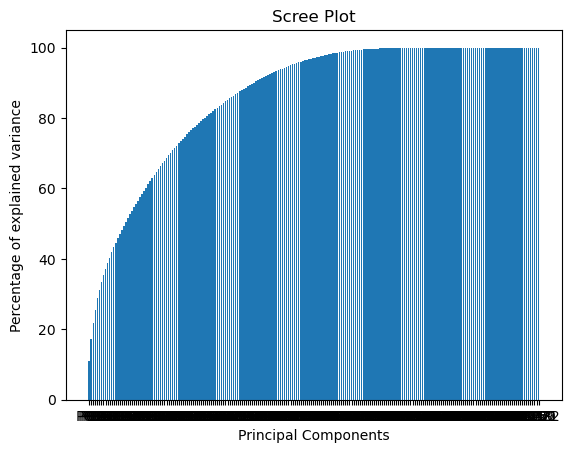

<Figure size 1500x1500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [97]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
labels=['PC'+str(u) for u in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1),height=var,tick_label=labels)

plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Components")
plt.title('Scree Plot')
plt.figure(figsize=(15,15))
plt.show()
plt.savefig("PCA.png")

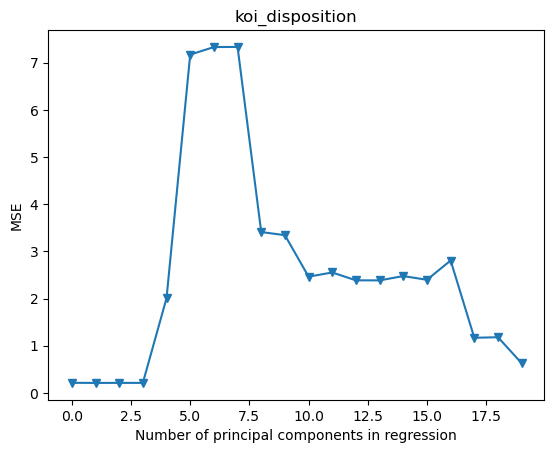

In [98]:
n = len(X_reduced)
kf_10 = KFold(n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_reduced[:,:i], y_train.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('koi_disposition')
plt.xlim(xmin=-1);
plt.savefig("KF.png")

In [99]:
regr_test = LinearRegression()
regr_test.fit(X_reduced, y_train)
regr_test.coef_

array([ 1.01616836e-02, -4.72286486e-03, -4.27931717e-03,  2.35819889e-03,
       -1.04236879e-03, -1.10693378e-04,  6.49742614e-04,  3.04899699e-02,
       -2.73298641e-03,  1.62444059e-02, -1.16200098e-02,  7.30152587e-03,
       -9.87152214e-04, -9.36014143e-03, -1.33679148e-02,  7.45935436e-03,
       -2.47557270e-02,  1.43607111e-03,  1.38809772e-02,  2.75646654e-03,
        3.73240346e-03,  3.89747808e-03,  1.26715175e-02, -1.49223976e-02,
        1.54476668e-02,  6.98820078e-04,  3.43881918e-03, -2.78858604e-03,
       -6.88338303e-03, -1.67820413e-03, -1.66570456e-02,  1.29485956e-02,
        7.91447154e-04,  8.01158364e-03, -6.86000466e-03,  1.17648834e-02,
       -1.15938680e-02,  1.00448367e-02, -1.63966145e-02,  8.79745562e-03,
       -4.07769906e-03,  2.07764436e-02, -1.93054036e-02, -8.11710897e-03,
       -1.95645615e-02,  4.36131754e-03,  1.00334253e-02, -7.32828990e-03,
       -1.47175660e-02,  2.91795076e-02,  3.12299188e-02,  2.62586356e-02,
       -1.91743971e-02,  

In [121]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]

max_features = ['int', 'auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(1, 100, num = 100)]
max_depth.append(None)

min_samples_split = [int(x) for x in np.linspace(1, 100, num = 100)]

min_samples_leaf = [int(x) for x in np.linspace(1, 100, num = 100)]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

rf_search = RandomizedSearchCV(rf, random_grid, n_iter=40, cv=10)
rf_search.fit(X_train_scaled, y_train)
bh = rf_search.best_params_
bs = rf_search.best_score_
print(bh)
print(bs)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['int', 'auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], '

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
260 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\nellu\anaconda3\Lib\site-packag

{'n_estimators': 2000, 'min_samples_split': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 46, 'bootstrap': False}
0.9947956766360676


In [101]:
n_components = np.arange(1, X_train_scaled.shape[1] + 1)
pls_scores = []

In [102]:
for n in n_components:
    pls = PLSRegression(n_components=n)
    scores = cross_val_score(make_pipeline(StandardScaler(), pls), X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    pls_scores.append(np.mean(scores))

In [103]:
best_pls_n = n_components[np.argmax(pls_scores)]
best_pls_model = make_pipeline(StandardScaler(), PLSRegression(n_components=best_pls_n))
best_pls_model.fit(X_train_scaled, y_train)
print(f'Best PLS Components: {best_pls_n}')

Best PLS Components: 1


In [122]:
pls_param_grid = {'plsregression__n_components': np.arange(1, X_train_scaled.shape[1] + 1)}
pls_grid = GridSearchCV(make_pipeline(StandardScaler(), PLSRegression()), param_grid=pls_param_grid, cv=5, scoring='neg_mean_squared_error')
pls_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('plsregression', PLSRegression())]),
             param_grid={'plsregression__n_components': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65...
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195,
       196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208,
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222])},
             scoring='neg_mean_squared_error')

In [ ]:
best_ridge_alpha = ridge_grid.best_params_['alpha']
best_lasso_alpha = lasso_grid.best_params_['alpha']
best_pca_n = pca_grid.best_params_['pca__n_components']
best_pls_n = pls_grid.best_params_['plsregression__n_components']

In [ ]:
best_ridge_model = Ridge(alpha=best_ridge_alpha)
best_ridge_model.fit(X_train_scaled, y_train)

In [ ]:
best_lasso_model = Lasso(alpha=best_lasso_alpha)
best_lasso_model.fit(X_train_scaled, y_train)

In [ ]:
best_pca_model = make_pipeline(StandardScaler(), PCA(n_components=best_pca_n))
best_pca_model.fit(X_train_scaled, y_train)

In [ ]:
best_pls_model = make_pipeline(StandardScaler(), PLSRegression(n_components=best_pls_n))
best_pls_model.fit(X_train_scaled, y_train) 

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(n_components, np.abs(pca_scores), label='PCA', marker='o')
plt.plot(n_components, np.abs(pls_scores), label='PLS', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error (CV)')
plt.legend()
plt.title('Bias-Variance Trade-off for PCA and PLS')
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

num_top_features = 15
top_indices = np.argsort(importances)[-num_top_features:]

feature_correlations = X_train.corrwith(y_train)

num_additional_features = 15
additional_indices = np.argsort(np.abs(feature_correlations))[:num_additional_features]

combined_indices = np.concatenate((top_indices, additional_indices))

X_train1 = X_train.iloc[:, combined_indices]
X_test1 = X_test.iloc[:, combined_indices]

correlation_matrix = X_train1.corr()


In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Pairwise Correlation Heatmap")
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(30, 30))

axes_flat = axes.flatten()

for i in range(5):
    for j in range(5):
        start_row = i * 5
        end_row = start_row + 5
        start_col = j * 5
        end_col = start_col + 5
        sub_matrix = correlation_matrix.iloc[start_row:end_row, start_col:end_col]

        sns.heatmap(sub_matrix, annot=True, cmap='coolwarm', fmt=".3f", ax=axes_flat[i * 5 + j])
        axes_flat[i * 5 + j].set_title(f'Subplot {i+1}-{j+1}')
plt.tight_layout()
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

In [ ]:
y_pred = logistic_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

In [106]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

y_pred = lda_model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Overall Accuracy:\n", accuracy_score(y_test, y_pred))

prediction_counts = Counter(y_pred)

print("Prediction Counts:\n", prediction_counts)

print("Coefficients:\n", lda_model.coef_)
print("Intercept:\n", lda_model.intercept_)

Confusion Matrix:
 [[298  98]
 [ 46 876]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       396
           1       0.90      0.95      0.92       922

    accuracy                           0.89      1318
   macro avg       0.88      0.85      0.86      1318
weighted avg       0.89      0.89      0.89      1318

Overall Accuracy:
 0.8907435508345979
Prediction Counts:
 Counter({1: 974, 0: 344})
Coefficients:
 [[-3.63926604e-10 -7.18798984e-03  3.81484748e-10  7.18579502e-10
   1.56999404e-10 -2.96971533e-12 -4.01609606e-10 -2.97876316e-10
  -1.28414654e-09  3.69861892e-11 -1.69311070e-09 -6.22003566e-11
  -1.85978870e-10 -5.91393080e-10  1.65026676e-09 -3.52667935e-10
  -4.62761897e-04 -2.73422418e-04 -1.24285497e-09  1.26759454e-09
   1.25853899e-01  3.59003483e-01  1.62388104e-02 -5.28137105e-02
  -1.62513835e-02  1.91604247e-02 -9.96330114e-11  1.78139936e-09
  -7.33718547e-10 -5.64229372e-02  1.00013161e

In [107]:
clf = LinearDiscriminantAnalysis()

cv_scores = cross_val_score(clf, X,y,cv=10)

print('10-folds Cross-validation scores:', cv_scores)
print('Mean cross-validation score for 10-folds: {:.3f}'
     .format(np.mean(cv_scores)))

10-folds Cross-validation scores: [0.74090909 0.75454545 0.78359909 0.81776765 0.80637813 0.83599089
 0.83371298 0.91571754 0.82687927 0.81093394]
Mean cross-validation score for 10-folds: 0.813


In [108]:
from sklearn.model_selection import validation_curve

param_range =[1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(LinearDiscriminantAnalysis(), X, y,param_name = 'store_covariance',
                                            param_range=param_range, cv=10)
np.mean(test_scores,axis=1)

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

array([0.8126434, 0.8126434, 0.8126434, 0.8126434, 0.8126434, 0.8126434,
       0.8126434, 0.8126434, 0.8126434, 0.8126434])

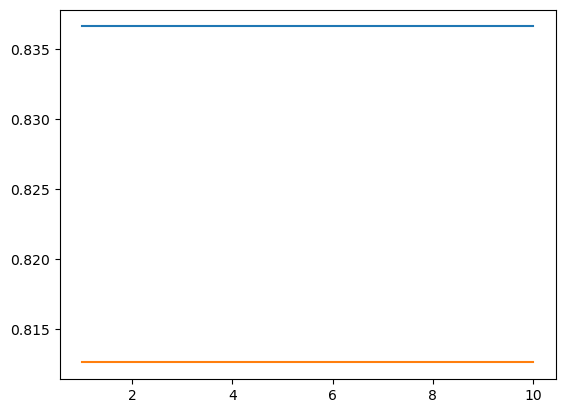

<Figure size 640x480 with 0 Axes>

In [109]:
plt.figure()

plt.plot(param_range,np.mean(train_scores,axis=1))
plt.plot(param_range,np.mean(test_scores,axis=1))


plt.show()
plt.savefig("LDA.png")

In [105]:
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

qda_predictions = qda_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, qda_predictions))
print("Classification Report:\n", classification_report(y_test, qda_predictions))
print("Overall Accuracy:\n", accuracy_score(y_test, qda_predictions))

prediction_counts = Counter(qda_predictions)
print("Prediction Counts:\n", prediction_counts)

Confusion Matrix:
 [[317  79]
 [582 340]]
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.80      0.49       396
           1       0.81      0.37      0.51       922

    accuracy                           0.50      1318
   macro avg       0.58      0.58      0.50      1318
weighted avg       0.67      0.50      0.50      1318

Overall Accuracy:
 0.4984825493171472
Prediction Counts:
 Counter({0: 899, 1: 419})


In [140]:
qda = QuadraticDiscriminantAnalysis() 

cv_scores = cross_val_score(qda, X,y,cv=10)

print('10-folds Cross-validation scores:', cv_scores)
print('Mean cross-validation score for 10-folds: {:.3f}'
     .format(np.mean(cv_scores)))

10-folds Cross-validation scores: [0.71136364 0.57954545 0.52164009 0.4191344  0.42596811 0.38724374
 0.41230068 0.43735763 0.45330296 0.48063781]
Mean cross-validation score for 10-folds: 0.483


In [141]:
from sklearn.model_selection import validation_curve

param_range =[1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(QuadraticDiscriminantAnalysis(),X ,y,param_name = 'store_covariance',
                                            param_range=param_range, cv=10)
np.mean(test_scores,axis=1)

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

array([0.48284945, 0.48284945, 0.48284945, 0.48284945, 0.48284945,
       0.48284945, 0.48284945, 0.48284945, 0.48284945, 0.48284945])

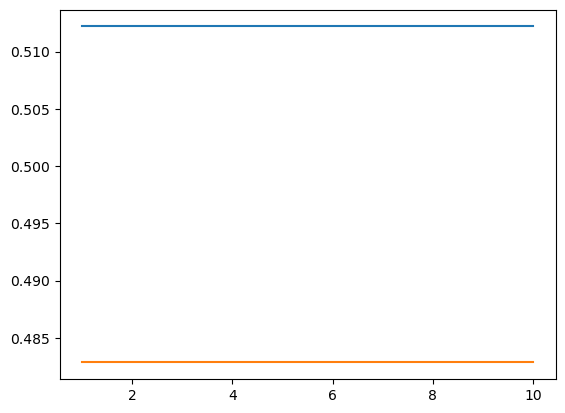

<Figure size 640x480 with 0 Axes>

In [142]:
plt.figure()

plt.plot(param_range,np.mean(train_scores,axis=1))
plt.plot(param_range,np.mean(test_scores,axis=1))


plt.show()
plt.savefig("QDA.png")

In [143]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_predictions = dt_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Overall Accuracy:\n", accuracy_score(y_test, dt_predictions))

prediction_counts = Counter(dt_predictions)
print("Prediction Counts: ", prediction_counts)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Cross-validated scores:", scores)

print("Feature Importances:\n", dt_model.feature_importances_)

Confusion Matrix:
 [[396   0]
 [  0 922]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       922

    accuracy                           1.00      1318
   macro avg       1.00      1.00      1.00      1318
weighted avg       1.00      1.00      1.00      1318

Overall Accuracy:
 1.0
Prediction Counts:  Counter({1: 922, 0: 396})
Cross-validated scores: [0.99837398 1.         1.         1.         1.        ]
Feature Importances:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [129]:
clf = DecisionTreeClassifier(max_depth=10)

cv_scores = cross_val_score(clf, X,y,cv=5)

print('5-folds Cross-validation scores:', cv_scores)
print('Mean cross-validation score for 5-fold: {:.3f}'
     .format(np.mean(cv_scores)))

5-folds Cross-validation scores: [1.         1.         1.         1.         0.99886105]
Mean cross-validation score for 5-fold: 1.000


In [130]:
from sklearn.model_selection import validation_curve

param_range =[1,2,3,4,5,6,7,8,9,10]
train_scores, test_scores = validation_curve(DecisionTreeClassifier(max_depth=10),X,y,
                                            param_name='ccp_alpha',
                                            param_range=param_range, cv=10)
np.mean(test_scores,axis=1)

array([0.69353386, 0.69353386, 0.69353386, 0.69353386, 0.69353386,
       0.69353386, 0.69353386, 0.69353386, 0.69353386, 0.69353386])

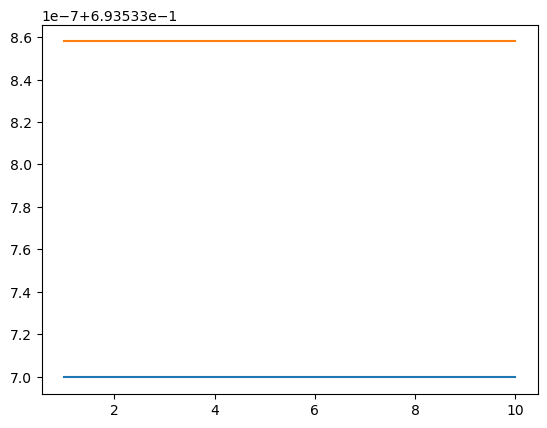

<Figure size 640x480 with 0 Axes>

In [131]:
plt.figure()

plt.plot(param_range,np.mean(train_scores,axis=1))
plt.plot(param_range,np.mean(test_scores,axis=1))


plt.show()
plt.savefig("DTC.png")

In [132]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)

In [133]:
print(bagging_predictions)


[0 1 1 ... 0 1 1]


In [134]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print(rf_predictions)

[0 1 1 ... 0 1 1]


In [135]:
clf = RandomForestClassifier()

cv_scores = cross_val_score(clf, X,y,cv=5)

print('5-folds Cross-validation scores:', cv_scores)
print('Mean cross-validation score for 5-fold: {:.3f}'
     .format(np.mean(cv_scores)))

5-folds Cross-validation scores: [0.99886234 1.         1.         0.9977221  0.99544419]
Mean cross-validation score for 5-fold: 0.998


In [136]:
from sklearn.model_selection import validation_curve

param_range =[1,2,3,4,5]
train_scores, test_scores = validation_curve(RandomForestClassifier(),X_train, y_train,
                                            param_name='bootstrap',
                                            param_range=param_range, cv=5)
np.mean(test_scores,axis=1)

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:591: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:59

array([0.9960965 , 0.99804772, 0.99837292, 0.99804772, 0.99707264])

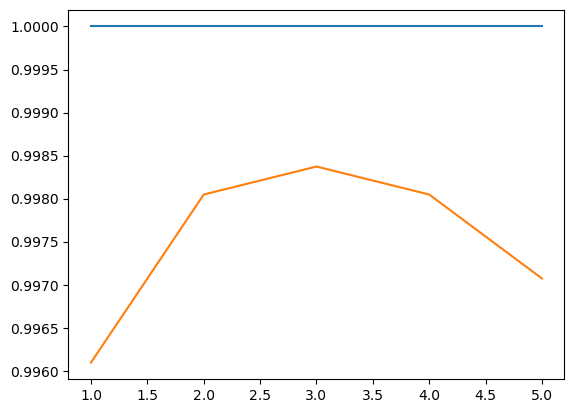

<Figure size 640x480 with 0 Axes>

In [137]:
plt.figure()

plt.plot(param_range,np.mean(train_scores,axis=1))
plt.plot(param_range,np.mean(test_scores,axis=1))


plt.show()
plt.savefig("RFC.png")

In [138]:
adaboost_model = AdaBoostClassifier(n_estimators=50)
adaboost_model.fit(X_train, y_train)
adaboost_predictions = adaboost_model.predict(X_test)
print(adaboost_predictions)

[0 1 1 ... 0 1 1]


In [139]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print(svm_predictions)

[1 1 1 ... 1 1 1]


In [113]:
knn =KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
print('Accuracy for training data is '+ str(knn.score(X_train_scaled ,y_train)))
print('Accuracy for testing data is '+ str(knn.score(X_test_scaled,y_test)))
Train = float(knn.score(X_train_scaled,y_train))
Test = float(knn.score(X_test_scaled,y_test))
Train - Test

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy for training data is 0.6909564085881588
Accuracy for testing data is 0.6995447647951442


c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


-0.008588356206985392

In [115]:
y_pred_train = knn.predict(X_train_scaled)
y_pred_test = knn.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
mean_sq_err_val_test = mean_squared_error(y_test, y_pred_test)
print('Train mean squared error=',mean_sq_err_val_train)
print('Test mean squared error=',mean_sq_err_val_test)

c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train mean squared error= 0.30904359141184123
Test mean squared error= 0.30045523520485584


c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [116]:
print(metrics.confusion_matrix(y_test,y_pred_test))

print(metrics.classification_report(y_test,y_pred_test, digits=2))

[[  0 396]
 [  0 922]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       396
           1       0.70      1.00      0.82       922

    accuracy                           0.70      1318
   macro avg       0.35      0.50      0.41      1318
weighted avg       0.49      0.70      0.58      1318



c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
scores=[]
best_score=0
best_attr=0
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    score=knn.score(X_test_scaled,y_test)
    scores.append(score)
    if score>best_score:
        best_score=score
        best_attr=i
    
print(f"Highest accuracy of {best_score} is achieved with {best_attr} neighbours")

Highest accuracy of 0.8361153262518968 is achieved with 16 neighbours


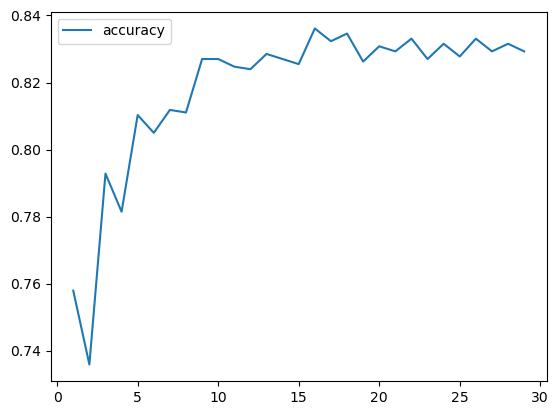

In [124]:
plt.plot(range(1,30),scores,label="accuracy")
plt.legend()
plt.savefig("knn.png")

In [125]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
#dtc.score(X_test, y_test)
print('Accuracy for training data is '+ str(dtc.score(X_train_scaled,y_train)))
print('Accuracy for testing data is '+ str(dtc.score(X_test_scaled,y_test)))
Train = float(dtc.score(X_train,y_train))
Test = float(dtc.score(X_test,y_test))
Train - Test

Accuracy for training data is 0.7905009759271308
Accuracy for testing data is 0.7701062215477997


c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.0

In [126]:
y_pred_train = dtc.predict(X_train_scaled)
y_pred_test = dtc.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error
mean_sq_err_val_train = mean_squared_error(y_train,y_pred_train)
mean_sq_err_val_test = mean_squared_error(y_test, y_pred_test)
print('Train mean squared error=',mean_sq_err_val_train)
print('Test mean squared error=',mean_sq_err_val_test)

Train mean squared error= 0.20949902407286922
Test mean squared error= 0.2298937784522003


c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [127]:
y_pred_test = dtc.predict(X_test_scaled)
y_pred_train = dtc.predict(X_train_scaled)
print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.classification_report(y_test,y_pred_test, digits=2))

[[396   0]
 [303 619]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72       396
           1       1.00      0.67      0.80       922

    accuracy                           0.77      1318
   macro avg       0.78      0.84      0.76      1318
weighted avg       0.87      0.77      0.78      1318



c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\nellu\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


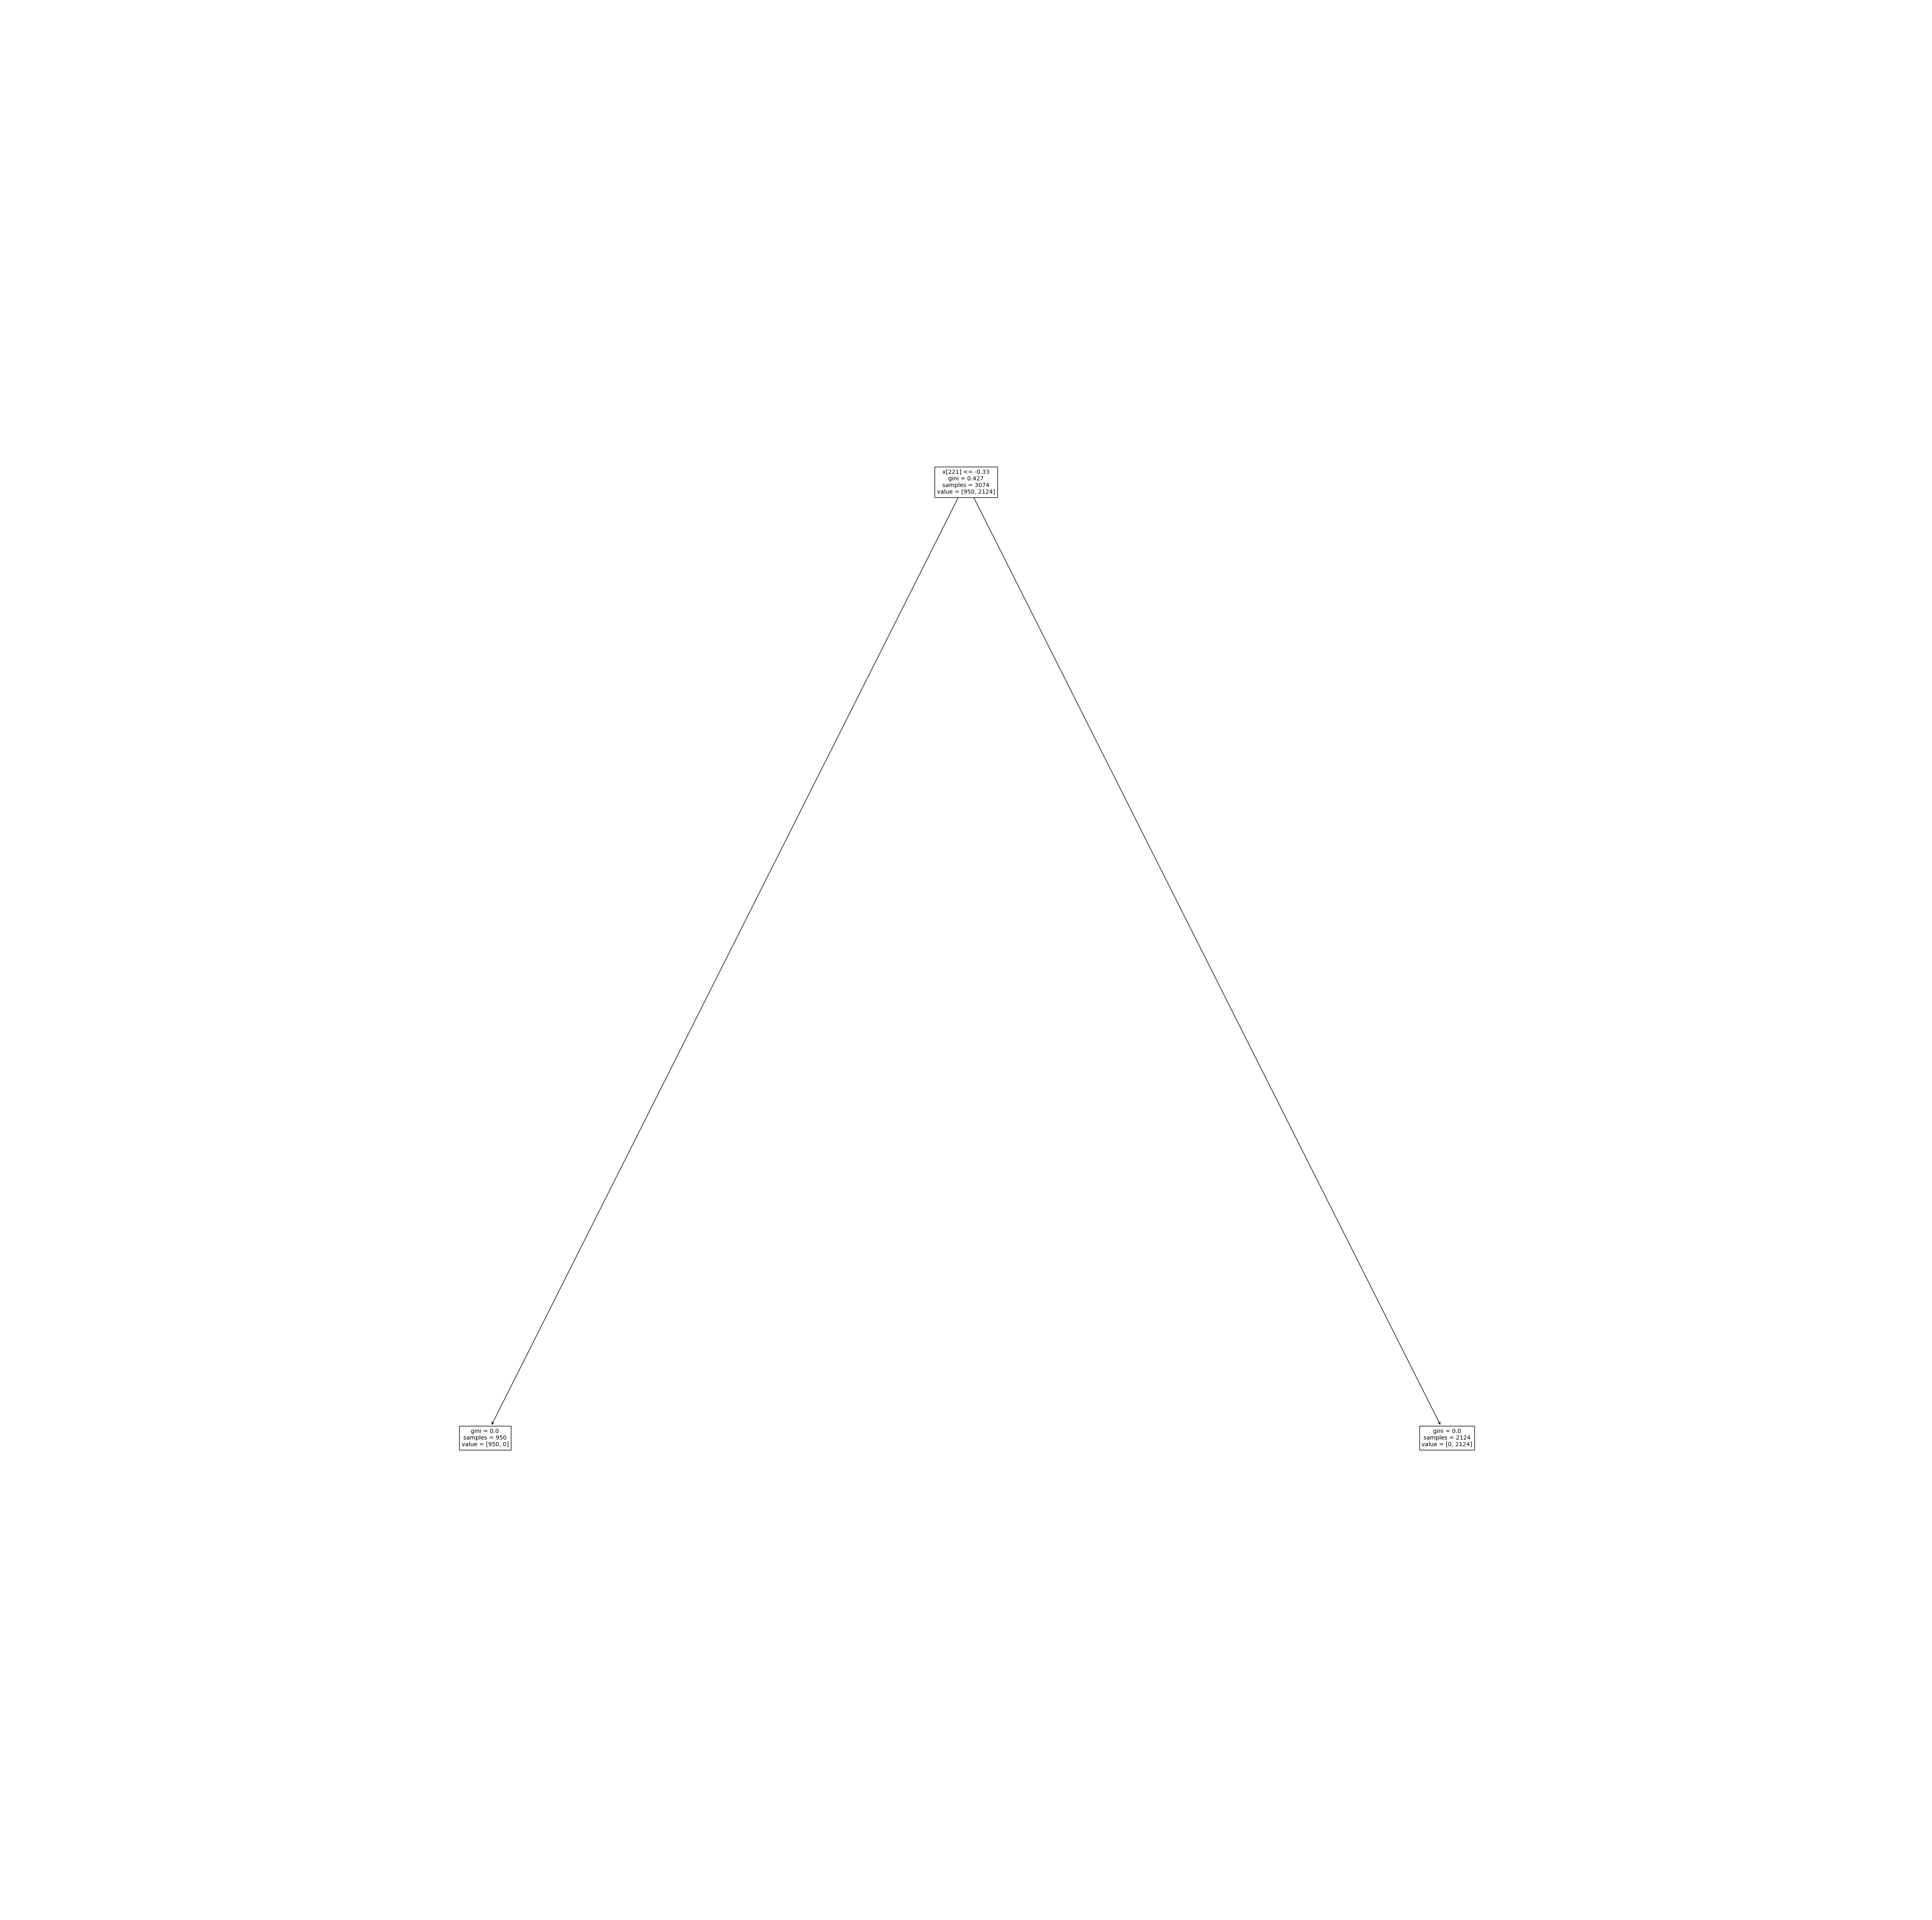

In [128]:
fig, ax = plt.subplots(figsize=(60, 60))
tree.plot_tree(dtc.fit(X_train_scaled, y_train), fontsize=10)
plt.show()